# **Predict the percentage of an student based on the no. of study hours.
● This is a simple linear regression task as it involves just 2 variables.
● You can use R, Python, SAS Enterprise Miner or any other tool
● Data can be found at http://bit.ly/w-data
● What will be predicted score if a student studies for 9.25 hrs/ day?**

In [4]:
#we import the required libraries
import pandas as pd
import numpy as np

In [6]:
#importing the data required to analyse
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"

#now we will write the data
df = pd.read_csv(url)


In [7]:
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [12]:
#to install matplotlib if not present
!pip install matplotlib


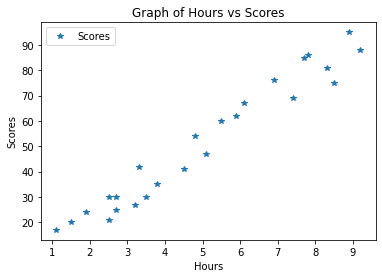

In [13]:
#For plotting the data we need to import the matplotlib library
import matplotlib.pyplot as plt

# Let's plot the data
df.plot(x = "Hours", y = "Scores", style = "*")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Graph of Hours vs Scores")
plt.show()

In [14]:
#We need to know about the input data that is no. of hours
hours = df.iloc[:, :-1]
hours

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5
5,1.5
6,9.2
7,5.5
8,8.3
9,2.7


In [15]:
scores = df.iloc[:, 1]
scores

0     21
1     47
2     27
3     75
4     30
5     20
6     88
7     60
8     81
9     25
10    85
11    62
12    41
13    42
14    17
15    95
16    30
17    24
18    67
19    69
20    30
21    54
22    35
23    76
24    86
Name: Scores, dtype: int64

In [17]:
#install sklearn if not present
!pip install sklearn

Using legacy 'setup.py install' for sklearn, since package 'wheel' is not installed.
    Running setup.py install for sklearn: started
    Running setup.py install for sklearn: finished with status 'done'


In [18]:
""" Now we need to create a model
for creating a model we will import the sklearn.model_selection libraray """

from sklearn.model_selection import train_test_split

hours_train, hours_test, scores_train, scores_test = train_test_split(hours, scores, random_state = 0)

In [19]:
# Let's train the model

from sklearn.linear_model import LinearRegression

regression = LinearRegression()
regression.fit(hours_train, scores_train)

LinearRegression()

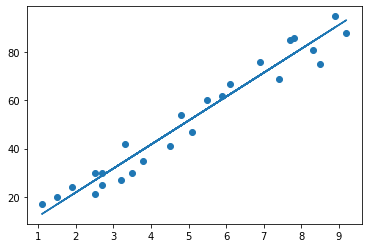

In [20]:
# Let's start processing towards the prediction

line = regression.coef_*hours + regression.intercept_
plt.scatter(hours, scores)
plt.plot(hours, line)
plt.show()

In [21]:
# Let's make prediction

print(hours_test)
scores_predicted = regression.predict(hours_test)
scores_predicted

    Hours
5     1.5
2     3.2
19    7.4
16    2.5
11    5.9
22    3.8
17    1.9


array([16.84472176, 33.74557494, 75.50062397, 26.7864001 , 60.58810646,
       39.71058194, 20.8213931 ])

In [22]:
#Final data after testing and training the model

final = pd.DataFrame({"Actual ": scores_test, "Prediction ": scores_predicted})
final

,Actual,Prediction
5,20,16.844722
2,27,33.745575
19,69,75.500624
16,30,26.786400
11,62,60.588106
22,35,39.710582
17,24,20.821393


In [23]:
# Let's check the Accuracy of our model. For that we will import the metrics library from sklearn

from sklearn import metrics

print("Mean Absolute Error: ", metrics.mean_absolute_error(scores_predicted, scores_test))

Mean Absolute Error:  4.130879918502486


In [25]:
hrs = float(input("Enter hours: "))
prediction = regression.predict([[hrs]])
print("If you read for ", hrs, " hours ", "you will score ",prediction," percentage in your examination")

Enter hours: 9.25
If you read for  9.25  hours  you will score  [93.89272889]  percentage in your examination
